## Dataanalyse

Vi analyserer nå et datasett. Først må vi laste inn data, og deretter vil vi visualisere deler av datasettet.

For å demonstrere på offentlig tilgjengelig data som det er enkelt å forholde seg til laster vi ned meteologisk data for Bergen. For enkelthets skyld 
ser vi på temperatur. Datasettet inneholder mere informasjon som vi ignorerer for nå.

Først importerer vi funksjonalitet vi trenger. Modulen `pandas` blir importert med det korte navnet `pd` og modulen `meteostat` blir importert.

Pandas gir oss alt vi kan gjøre med regneark i python. Meteostat lar oss laste ned meteologisk data. Vi impoterer også numpy til senere bruk.

In [1]:
# Her importeres Point og Daily funksjonalitetene fra meteostat modulen.
# Hvis meteostat ikke allerede er installert blir den installert.
try:
  import meteostat as ms
except:
  !pip install meteostat
  import meteostat as ms

In [2]:
# Her importeres modulen pandas som pd
import pandas as pd

In [3]:
# Vi importerer numpy til bruk senere
import numpy as np

In [4]:
# Her importeres funksjonaliteten datetime fra modulen datetime.
# Datetime gir oss en bekvem måte å jobbe med tidsdate på.

from datetime import datetime, timedelta

In [5]:
# Sett tidsperioden vi vil hente data fra
# Data for fremtiden kan ikke lastes inn, så når vi ber om å laste inn data får vi data helt opp til i dag.

start = datetime(1973, 1, 1)
end = datetime.today()

In [6]:
# Vi angir GPS koordinatene til Bergen
# Google maps gir oss koordinatene under. Høyden gjetter jeg meg til.

realfagsbygget = ms.Point(60.38526, 5.328060, 10)

In [7]:
stations = ms.stations.nearby(realfagsbygget, limit=4)

In [8]:
stations

,name,country,region,latitude,longitude,elevation,timezone,distance
id,,,,,,,,
01317,Bergen / Florida,NO,HO,60.3833,5.3333,12,Europe/Oslo,361.1
01311,Bergen / Flesland,NO,HO,60.2833,5.2333,5,Europe/Oslo,12479.4
01314,Fossmark / Stanghelle,NO,HO,60.5206,5.7247,10,Europe/Oslo,26448.4
01327,Kvamskogen-jonshogdi / Kleivi,NO,HO,60.3886,5.9639,455,Europe/Oslo,34938.6


In [9]:
bergen = ms.stations.meta(station='01317')

In [10]:
bergen

Station(id='01317', name='Bergen / Florida', country='NO', region='HO', identifiers={'wmo': '01317', 'ghcn': 'NO000050540', 'usaf': '013170', 'national': 'SN50540'}, latitude=60.3833, longitude=5.3333, elevation=12, timezone='Europe/Oslo')

In [11]:
# Vi laster ned timebaserte målinger for den angitte tidsperioden

data = ms.hourly(bergen, start, end)
data = data.fetch()

La oss spørre hva data er for noe.

In [12]:
data

,temp,rhum,prcp,snwd,wdir,wspd,wpgt,pres,tsun,cldc,coco
time,,,,,,,,,,,
1973-01-01 00:00:00,6.0,93,<NA>,<NA>,170,29.5,<NA>,1019.4,<NA>,8,<NA>
1973-01-01 03:00:00,7.0,93,<NA>,<NA>,170,9.0,<NA>,1019.6,<NA>,8,<NA>
1973-01-01 06:00:00,<NA>,<NA>,<NA>,<NA>,180,13.0,<NA>,1019.0,<NA>,8,<NA>
1973-01-01 09:00:00,7.0,87,<NA>,<NA>,160,20.2,<NA>,1019.6,<NA>,8,<NA>
1973-01-01 12:00:00,8.0,87,<NA>,<NA>,170,27.7,<NA>,1019.1,<NA>,8,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
2026-01-06 11:00:00,-7.5,41,0.0,<NA>,80,8.3,15.5,1010.9,<NA>,0,1
2026-01-06 12:00:00,-6.5,40,0.0,<NA>,87,5.8,14.4,1010.6,<NA>,0,1
2026-01-06 13:00:00,-6.1,42,0.0,<NA>,88,3.2,9.4,1010.1,<NA>,0,1


#### Hva er det vi plotter under?

In [13]:
temperaturer = data['temp']

#### Stemmer data under overens med hva du har erfart?

In [14]:
temp_siste_to_uker = temperaturer.loc[end - timedelta(days=14): end]

<Axes: xlabel='time'>

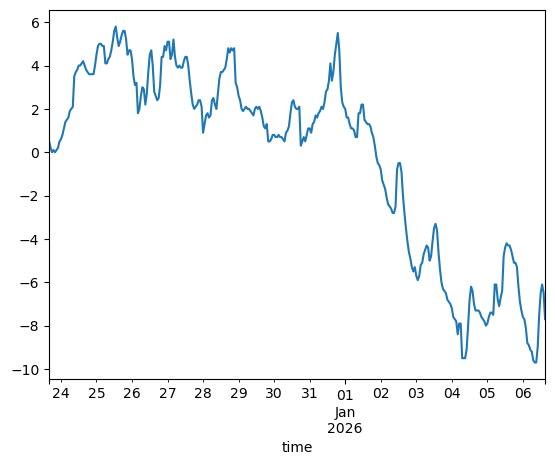

In [17]:
temp_siste_to_uker.plot()

In [15]:
# Daglig gjennomsnittstemperatur de siste to ukene.

daglig_gjennomsnitt_temp_siste_to_uker = temp_siste_to_uker.resample('D').mean()
daglig_gjennomsnitt_temp_siste_to_uker

time
2025-12-23         0.2
2025-12-24       2.925
2025-12-25    4.929167
2025-12-26    3.333333
2025-12-27      3.6125
2025-12-28      3.0625
2025-12-29    1.670833
2025-12-30    1.133333
2025-12-31    2.720833
2026-01-01         1.1
2026-01-02   -2.654167
2026-01-03     -5.2375
2026-01-04     -7.7875
2026-01-05   -6.008333
2026-01-06    -8.23125
Freq: D, Name: temp, dtype: Float64

<Axes: xlabel='time', ylabel='daglig gjennomsnittstemperatur'>

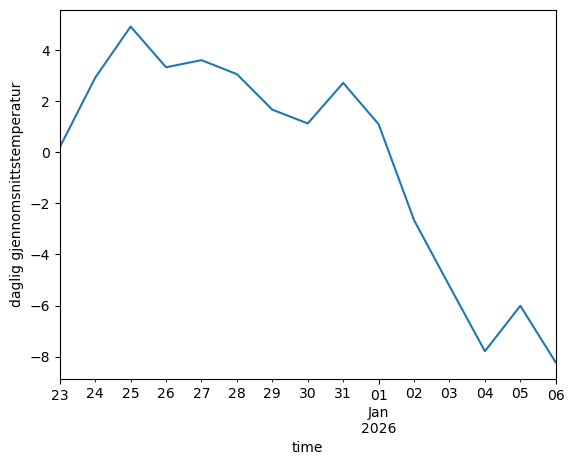

In [16]:
# Plot daglig gjennomsnittstemperatur de siste to ukene.

daglig_gjennomsnitt_temp_siste_to_uker.plot(ylabel='daglig gjennomsnittstemperatur')

<Axes: xlabel='time', ylabel='temperatur'>

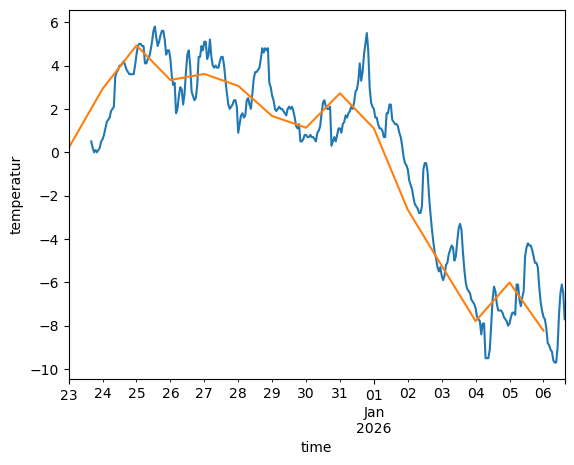

In [21]:
#Begge plott i samme figur

temp_siste_to_uker.plot()

daglig_gjennomsnitt_temp_siste_to_uker.plot(ylabel='temperatur')

### Spørsmål:

Hva kan du si om temperaturen i Bergen når du ser på figuren over?

Er der et spørsmål om temperaturen i Bergen du kunne ønske å få når hvis du kjenner temperaturene helt siden 1973?

La oss igjen spørre litt om hva `data` egentlig er for noe. Enkleste måte å gjøre det på er ved å skrive `data` til python og se hva som skjer.

In [22]:
data

,temp,rhum,prcp,snwd,wdir,wspd,wpgt,pres,tsun,cldc,coco
time,,,,,,,,,,,
1973-01-01 00:00:00,6.0,93,<NA>,<NA>,170,29.5,<NA>,1019.4,<NA>,8,<NA>
1973-01-01 03:00:00,7.0,93,<NA>,<NA>,170,9.0,<NA>,1019.6,<NA>,8,<NA>
1973-01-01 06:00:00,<NA>,<NA>,<NA>,<NA>,180,13.0,<NA>,1019.0,<NA>,8,<NA>
1973-01-01 09:00:00,7.0,87,<NA>,<NA>,160,20.2,<NA>,1019.6,<NA>,8,<NA>
1973-01-01 12:00:00,8.0,87,<NA>,<NA>,170,27.7,<NA>,1019.1,<NA>,8,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
2026-01-06 11:00:00,-7.5,41,0.0,<NA>,80,8.3,15.5,1010.9,<NA>,0,1
2026-01-06 12:00:00,-6.5,40,0.0,<NA>,87,5.8,14.4,1010.6,<NA>,0,1
2026-01-06 13:00:00,-6.1,42,0.0,<NA>,88,3.2,9.4,1010.1,<NA>,0,1


Hvis vi vil vite litt mere om hva `data` er for noe kan vi spørre om typen til `data`.

In [23]:
type(data)

pandas.core.frame.DataFrame

Vi får å vite at `data` er en `DataFrame`. Dette er det næmeste vi kommer på et exel regneark i python. 
Et regneark kan leses inn i en `DataFrame` i python og en `DataFrame` kan eksporteres til en excel fil. 

Ser vi på informasjonen i `data` ser vi at det står `NA` på mange plasser. Det betyr at vi mangler data på disse 
plassene. Vi kan spørre hvor mange ganger det står `NA` i `temp` kolonnen:

Samme spørsmål for `temperaturer`

In [25]:
type(temperaturer)

pandas.core.series.Series

In [27]:
temperaturer

time
1973-01-01 00:00:00     6.0
1973-01-01 03:00:00     7.0
1973-01-01 06:00:00    <NA>
1973-01-01 09:00:00     7.0
1973-01-01 12:00:00     8.0
                       ... 
2026-01-06 11:00:00    -7.5
2026-01-06 12:00:00    -6.5
2026-01-06 13:00:00    -6.1
2026-01-06 14:00:00    -6.5
2026-01-06 15:00:00    -7.7
Name: temp, Length: 264367, dtype: Float64

Det er kjedelig. Det står `NA` i kolonnen `temp`! 

Hvor mange ganger?

In [28]:
temperaturer.isna().sum()

np.int64(570)

### Spørsmål:

Er der noen meningsfulle tall vi kan skrive inn på de plassene der informasjon mangler?

Hva skjer i linjen under?

Bruk gjerne KI til å finne et svar!

In [29]:
temperaturer_ffill = temperaturer.resample('h').mean()
temperaturer_ffill = temperaturer_ffill.ffill()

<Axes: xlabel='time', ylabel='temp'>

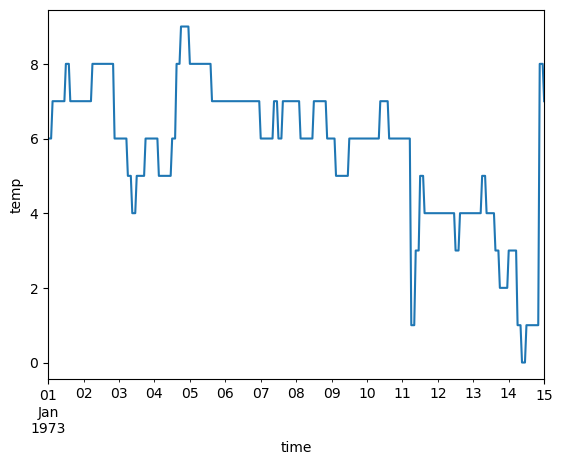

In [30]:
temperaturer_ffill.loc[start: start + timedelta(days=14)].plot(ylabel='temp')

<Axes: xlabel='time', ylabel='temp'>

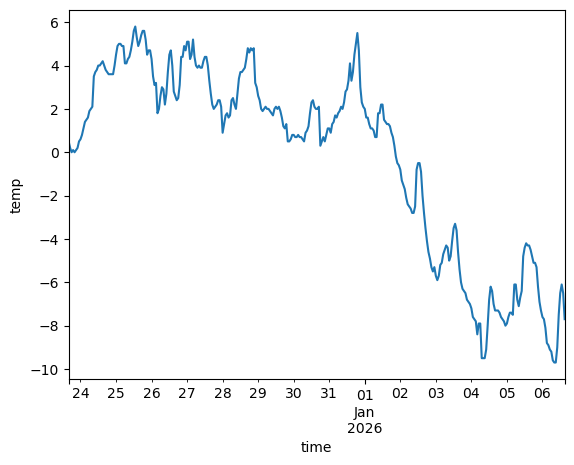

In [31]:
temperaturer_ffill.loc[end - timedelta(days=14): end].plot(ylabel='temp')

In [32]:
rullende_temperaturer = temperaturer_ffill.rolling(20*365*24).mean()

### Spørsmål:

Hva forteller figuren under til oss?

<Axes: xlabel='time'>

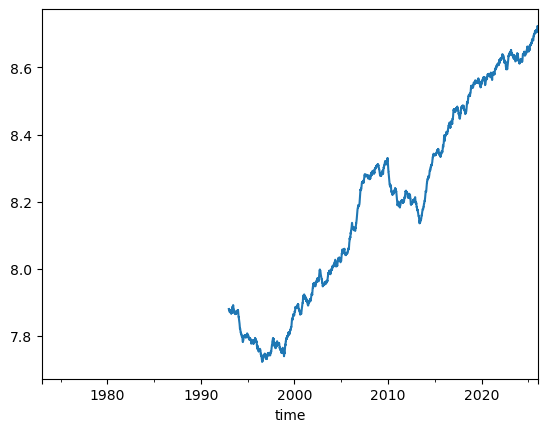

In [33]:
rullende_temperaturer.plot()

### <font color='DarkCyan'> Spørsmål:</font>

<font color='Crimson'>Kan du lage en figur som forteller hvordan tiårlig gennomsnittstemperatur endrer seg?</font>

In [ ]:
temp_første_to_uker = data.loc[start: start + timedelta(days=14)]['temp']

In [ ]:
resample = temp_første_to_uker.resample('h').mean()
resample = resample.ffill()

In [ ]:
temp_første_to_uker

In [ ]:
resample.plot()
temp_første_to_uker.plot()

In [ ]:
resample